# Fudan RPML Assignment1: Machine Learning Meets Fashion

![Machine Learning Meets Fashion](./img/ml_meets_fashion.jpg)

*Your name and Student ID: [Name], [Student ID]*

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission.*

In this assignment, you will use what you have learned to tackle some pratical problems. Fashion MNIST dataset[1] is the MNIST-like fashion product database for image classification you will play with this time. It originally consists of a training set of 60000 examples and a test set of 10000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

To make this task more realistic, we selected 14600 labeled examples from the training set and did a little processing. You have to do this image classifictaion task with our new dataset. 

You have to impletement several standard classification methods in the './fudanPRML' folder:
- K-nearest Neighbor (15 points)
- Softmax (15 points)
- Neural Network (30 points)    

and then do your exploration (30 points).

You can only use some basic python libraries in your experiment like numpy, paddle(without using the paddle.nn), matplotlib and so on. And please write down the version with them in the './requirements.txt' file.

## 1. Setup

In [1]:
# setup code
%load_ext autoreload
%autoreload 2
# 当导入了自己写的python模块时，在ipynb文件里import一次之后，即使修改了的python模块，重新运行import其实还是用的之前的python模块
# 因为已经将该模块在第一次导入时存在了内存里，第二次import没效果，这时需要重启kenel才能导入修改过的python模块。
# 此处首先自动加载导入的python模块，保证你每次在ipynb里使用的模块是最新版本，所以在你修改了模块代码之后，不需要重新刷新你的kenel。


In [2]:
import paddle
%matplotlib inline
from matplotlib import pyplot as plt

paddle.device.get_device()
paddle.set_device(paddle.device.get_device())

Place(cpu)

In [3]:
import numpy as np
import paddle
dataset_path = './dataset'

X_train = np.load(dataset_path + '/X_train.npy')
y_train = np.load(dataset_path + '/y_train.npy')
X_test = np.load(dataset_path + '/X_test.npy')
y_test = np.load(dataset_path + '/y_test.npy')

is_shuffle = True
if is_shuffle:
    idx = paddle.randperm(X_train.shape[0])
    X_train = X_train[idx]
    y_train = y_train[idx]

In [42]:
label_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

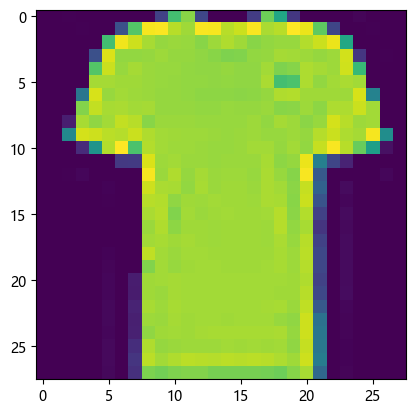

In [43]:
%matplotlib inline
# 可以将matplotlib的图表直接嵌入到Notebook之中，或者使用指定的界面库显示图表
from matplotlib import pyplot as plt

plt.imshow(X_train[0].reshape(28,28))

## 2. Exploratory Data Analysis (5 points)

Your may have to explore the dataset and do some analysis first.

训练集数据类型： uint8
训练集中元素最大值/最小值： 255 / 0
训练集中各类别条目数量:
 [6000, 4000, 1000, 1000, 1000, 1000, 200, 200, 100, 100]


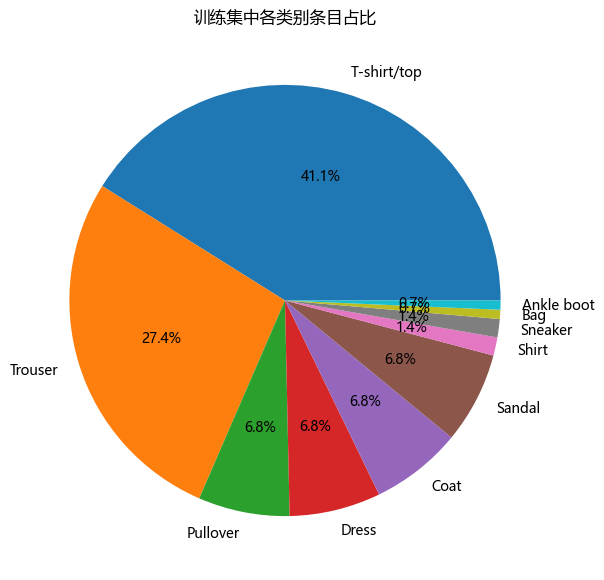

观察可知存在类别不均衡的问题



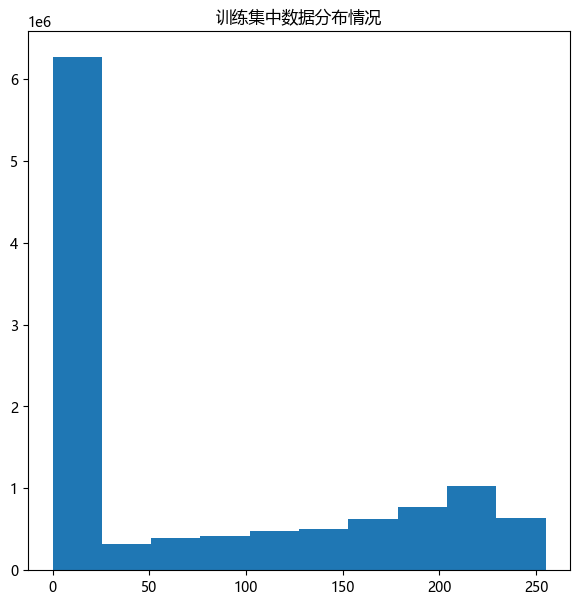

观察可知数据分布不均匀，而且0较多，且值的差异较大，从0-255不等



In [48]:
print('训练集数据类型：',X_train.dtype)
print('训练集中元素最大值/最小值：',np.max(X_train),'/',np.min(X_train))

label_summary = [0 for i in range(10)]
for label in y_train:
    label_summary[label] = label_summary[label] + 1
print('训练集中各类别条目数量:\n',label_summary)
plt.figure(figsize=(7,7))
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']  #指定字体为雅黑，解决文字乱码问题
plt.title('训练集中各类别条目占比')
plt.pie(label_summary,labels=label_name,autopct="%1.1f%%")
plt.show()
print('观察可知存在类别不均衡的问题\n')
plt.figure(figsize=(7,7))
X_train_list = X_train.reshape(-1)
plt.title('训练集中数据分布情况')
plt.hist(X_train_list)
plt.show()
print('观察可知数据分布不均匀，而且0较多，且值的差异较大，从0-255不等\n')

## 3. Methodology

### 3.1 K-nearest Neighbor (15 points)

#### 实例化KNN分类器

In [10]:
from fudanPRML.neighbors.k_nearest_neighbor import KNearestNeighbor
clf = KNearestNeighbor()
clf.fit(X_train, y_train)
dists = clf.compute_distances_no_loops(X_test)
print(dists.shape)

(10000, 14600)


#### 进行5折交叉验证选择最优超参数k的值

In [11]:
num_folds = 5
k_choices = [1, 3, 4, 5,6,7, 8]

X_train_folds = []
y_train_folds = []
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(y_train, num_folds)
k_to_accuracies = {}
for k in k_choices:
    acc = []
    for i in range(num_folds):
        X_val_train = np.vstack(X_train_folds[0:i] + X_train_folds[i+1:])
        y_val_train = np.hstack(y_train_folds[0:i] + y_train_folds[i+1:])
        clf.fit(X_val_train,y_val_train)
        y_pred = clf.predict(X_train_folds[i], k)
        num_correct = np.sum(y_pred == y_train_folds[i])
        accuracy = float(num_correct) / len(y_train_folds[i])
        acc.append(accuracy)
        k_to_accuracies[k] = acc


# 打印出计算的精度
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy),end = '\t')
    print()
    


k = 1, accuracy = 0.906849	k = 1, accuracy = 0.898630	k = 1, accuracy = 0.896233	k = 1, accuracy = 0.906164	k = 1, accuracy = 0.904452	
k = 3, accuracy = 0.910616	k = 3, accuracy = 0.905822	k = 3, accuracy = 0.909589	k = 3, accuracy = 0.913014	k = 3, accuracy = 0.916781	
k = 4, accuracy = 0.915411	k = 4, accuracy = 0.905137	k = 4, accuracy = 0.912671	k = 4, accuracy = 0.915753	k = 4, accuracy = 0.918493	
k = 5, accuracy = 0.916438	k = 5, accuracy = 0.905137	k = 5, accuracy = 0.912329	k = 5, accuracy = 0.913356	k = 5, accuracy = 0.917466	
k = 6, accuracy = 0.910274	k = 6, accuracy = 0.903425	k = 6, accuracy = 0.910616	k = 6, accuracy = 0.913356	k = 6, accuracy = 0.916438	
k = 7, accuracy = 0.913014	k = 7, accuracy = 0.903082	k = 7, accuracy = 0.908562	k = 7, accuracy = 0.915411	k = 7, accuracy = 0.915068	
k = 8, accuracy = 0.912329	k = 8, accuracy = 0.902397	k = 8, accuracy = 0.909247	k = 8, accuracy = 0.910959	k = 8, accuracy = 0.913699	


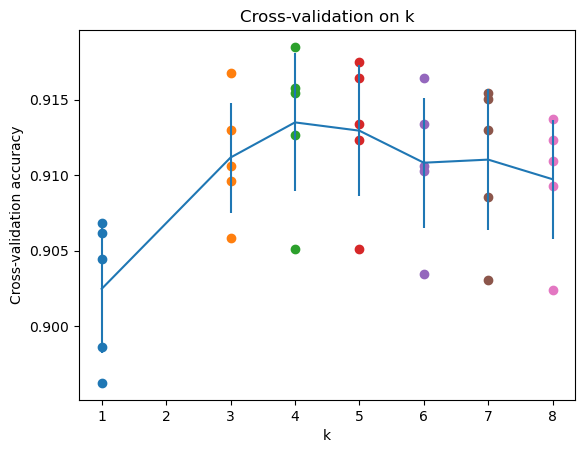

In [12]:
# 绘制原始观察结果
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# 用与标准偏差相对应的误差线绘制趋势线
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

#### 选择最佳k值，使用全部训练数据训练分类器并测试

In [14]:
# 根据上述交叉验证结果，为k选择最佳值，使用所有训练数据重新训练分类器，
# 并在测试中对其进行测试数据。
best_k = k_choices[accuracies_mean.argmax()]
print('best_k = ',best_k)
clf = KNearestNeighbor()
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test_pred)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test_pred), accuracy))

best_k =  4
Got 7757 / 10000 correct => accuracy: 0.775700


### 3.2 Softmax (15 points)

#### 3.2.1 处理数据集，从训练集再次划分出验证集，用于最优模型保存

In [36]:
# 验证集比例
valid_rate = 0.3

data_num = X_train.shape[0]
train_num = int(data_num*(1 - valid_rate))

# 训练数据类型是uint8，但是paddle居然不支持! 这里分别转为float32和int32
X_train_set = paddle.to_tensor(X_train[:train_num],dtype='float32') 
X_valid_set = paddle.to_tensor(X_train[train_num:],dtype='float32')
y_train_set = paddle.to_tensor(y_train[:train_num],dtype='int32')   
y_valid_set = paddle.to_tensor(y_train[train_num:],dtype='int32')
X_test_set = paddle.to_tensor(X_test,dtype = 'float32')
y_test_set = paddle.to_tensor(y_test,dtype = 'int32')

#### 3.2.2 定义模型、损失函数、优化器、评价指标、绘图函数、封装好的用于训练测试的Runner类

In [37]:
from fudanPRML.linear_model.softmax import SoftmaxClassifier
from fudanPRML.linear_model.criterion import MultiCrossEntropyLoss
from fudanPRML.linear_model.optimizer import SimpleBatchGD
from fudanPRML.linear_model.metric import accuracy
from fudanPRML.linear_model.plot import plot
from fudanPRML.linear_model.runner import RunnerV2

#### 3.2.3 设置参数，实例化模型

In [52]:
init_lr = 0.05
num_epochs = 1000
log_epochs = 10

model = SoftmaxClassifier(input_dim = 784 ,output_dim = 10)
metric = accuracy
criterion = MultiCrossEntropyLoss()
optimizer = SimpleBatchGD(init_lr=init_lr,model=model)
# 实例化RunnerV2
runner = RunnerV2(model, optimizer, metric, criterion)

#### 3.2.4 启动训练

In [53]:
runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs = num_epochs, log_epochs = log_epochs, save_path="best_model.pdparams")

best accuracy performence has been updated: 0.00000 --> 0.42146
[Train] epoch: 0, loss: 2.302591562271118, score: 0.40645793080329895
[Dev] epoch: 0, loss: 2.039687395095825, score: 0.42146119475364685
best accuracy performence has been updated: 0.42146 --> 0.42329
best accuracy performence has been updated: 0.42329 --> 0.73470
best accuracy performence has been updated: 0.73470 --> 0.76507
[Train] epoch: 10, loss: 2.045391082763672, score: 0.41575342416763306
[Dev] epoch: 10, loss: 1.826904535293579, score: 0.6342465877532959
best accuracy performence has been updated: 0.76507 --> 0.77123
best accuracy performence has been updated: 0.77123 --> 0.80205
best accuracy performence has been updated: 0.80205 --> 0.81895
best accuracy performence has been updated: 0.81895 --> 0.82511
[Train] epoch: 20, loss: 1.6515885591506958, score: 0.8095890283584595
[Dev] epoch: 20, loss: 1.6360368728637695, score: 0.8251141309738159
best accuracy performence has been updated: 0.82511 --> 0.82580
best ac

#### 3.2.6 绘制图像

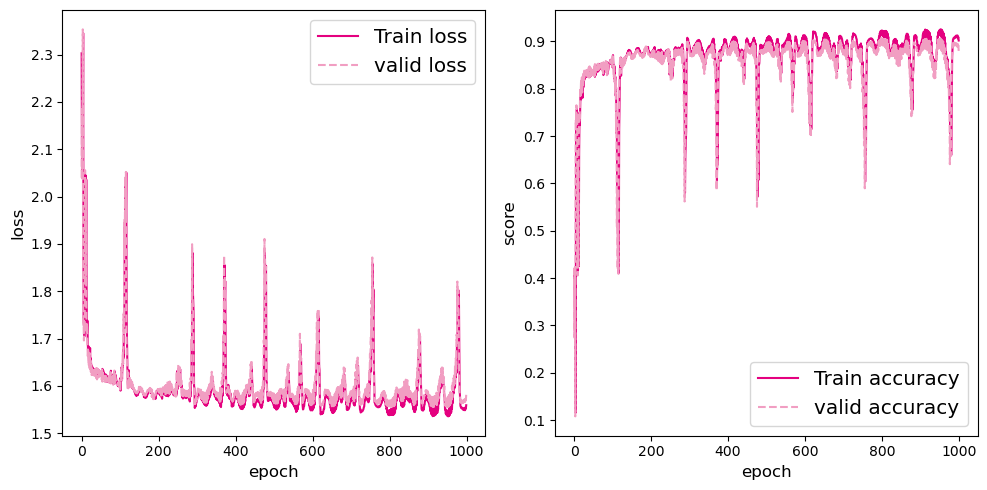

In [54]:
# 绘制训练过程中loss下降图像

plot(runner,fig_name='softmax_classifier.pdf')

#### 3.2.7 在测试集上评估模型

In [56]:
# 使用测试集评估模型

# 加载最优模型
runner.load_model('best_model.pdparams')
# 模型评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print(f'[Test Dataset]: accuracy:{score}, loss: {loss}')

[Test Dataset]: accuracy:0.7421000003814697, loss: 1.7190816402435303


#### 3.2.8 一些感受与分析


##### 关于使用验证集的问题：

类别不均衡问题仍然影响很大，在测试集上效果相当不好，使用验证集保存最优参数的方法，事实上也逐渐使得模型拟合在了验证集上

然而，我们应该注意到，本身测试集类别不均衡，验证集中更可能出现某些类别数量极其小的情况，因此反而效果更差。

##### 关于优化器和梯度下降过程：

一开始使用了lr = 0.1 的整批常规梯度下降方法，在训练到接近100轮epoch时，loss出现激增。分析原因，应该是在训练后期学习率过大所致，后续可以采用学习率衰减的方法

### 3.3 Neural Network (30 points)

#### 3.3.1 数据集构建
直接使用 3.2.1 中划分好的数据集，在此不再重复

In [59]:
# 验证集比例
valid_rate = 0.3

data_num = X_train.shape[0]
train_num = int(data_num*(1 - valid_rate))

# 训练数据类型是uint8，但是paddle居然不支持! 这里分别转为float32和int32
X_train_set = paddle.to_tensor(X_train[:train_num],dtype='float32') 
X_valid_set = paddle.to_tensor(X_train[train_num:],dtype='float32')
y_train_set = paddle.to_tensor(y_train[:train_num],dtype='int32')   
y_valid_set = paddle.to_tensor(y_train[train_num:],dtype='int32')
X_test_set = paddle.to_tensor(X_test,dtype = 'float32')
y_test_set = paddle.to_tensor(y_test,dtype = 'int32')

#### 3.3.2 定义模型、损失函数、优化器、评价指标、以及封装好的Runner类

In [64]:
from fudanPRML.neural_network.mlp import Model_MLP_L2
from fudanPRML.neural_network.mlp import Model_MLP_L5
from fudanPRML.neural_network.CrossEntropy import MultiCrossEntropyLoss
from fudanPRML.neural_network.optimizer import BatchGD
from fudanPRML.neural_network.metric import accuracy
from fudanPRML.neural_network.runner import RunnerV2_1
from fudanPRML.neural_network.Layer.ReLU import ReLU

#### 3.3.3 开始训练

In [ ]:
epoch_num = 3000

model_saved_dir = "model"

# 输入层维度为2
input_size = 784
# 隐藏层维度为5
hidden_size = 256
# 输出层维度为1
output_size = 10

# 定义网络
model = Model_MLP_L2(input_size=input_size, hidden_size=hidden_size, output_size=output_size)

# 这是一个5层神经网络
# model = Model_MLP_L5(input_size=input_size,output_size=output_size)

# 损失函数
loss_fn = MultiCrossEntropyLoss(model = model)

# 优化器
learning_rate = 0.1
optimizer = BatchGD(learning_rate, model)

# 评价方法
metric = accuracy

# 实例化RunnerV2_1类，并传入训练配置
runner = RunnerV2_1(model, optimizer, metric, loss_fn)

runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs=epoch_num, log_epochs=1, save_dir=model_saved_dir)

#### 3.3.4 绘制图像

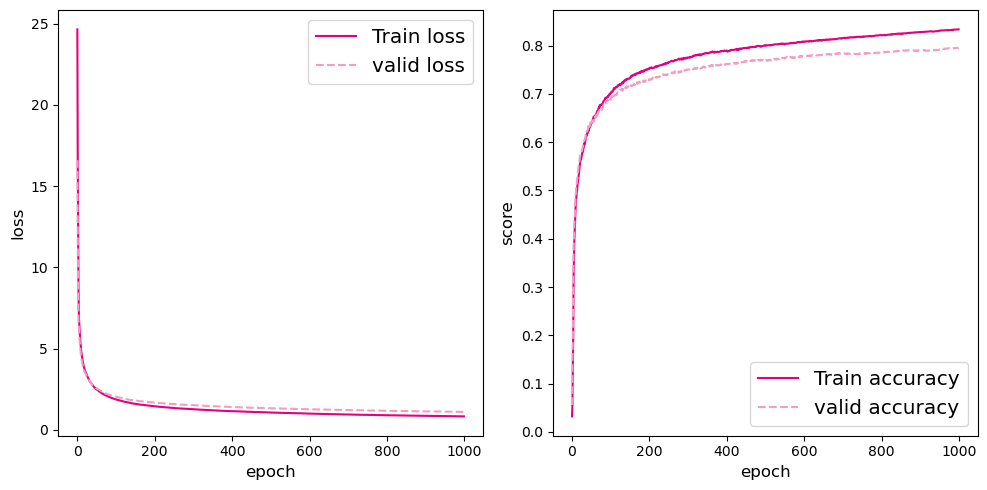

In [61]:
# 打印训练集和验证集的损失 
from fudanPRML.neural_network.plot import plot
plot(runner,fig_name='nnfigure')

#### 3.3.5 在测试集上评估模型

In [62]:
# 加载训练好的模型
runner.load_model(model_saved_dir)
# 在测试集上对模型进行评价
score, loss = runner.evaluate([X_test_set, y_test_set])

print("[Test] score/loss: {:.4f}/{:.4f}".format(score, loss))

[Test] score/loss: 0.5035/3.6166


### 3.4 Your Exploration (30 points)

#### 3.4.0 Normalization (归一化)

事实上我没有一开始就想到这个事情，属于是忘掉了。这是我做了后面一些探索之后发现不对劲才想起这个问题。

但是后面发现了两个问题：

1、就算采用了过采样，仍然得不到好的结果

2、我使用现在最流行的ReLU激活函数替换了之前的sigmoid(Logistic)激活函数，但发生梯度爆炸，接着来一次极其异常的参数更新，整个神经网络基本死亡，正确率预测基本固定在0.1，loss稳定在2.302（这是因为，神经网络就在瞎猜，10个类别瞎猜每十个数据猜中一个，loss就会是2.302这个可怕的数据）

为了解决这个问题我原来还怀疑是Linear层初始化的问题，故还去搜索资料，使用了Kaming He的初始化方法，仍然不见效果。

直到最后，回看以前在MNIST数据集上做的实验，才发现，人家先有一个整体的Normalization的过程！

寄！

来吧，先给整体数据做一下Normalization吧！ 0到255的值直接扔进去训练确实离谱

我使用了经典的Standardization方法（又称Z-score）, 转换后分布的参数可能会变，但分布类型不会改变，更不一定就是正态分布(误区)

$$

x = \frac{x - x_{mean}}{std}

$$

这种方法被广泛应用于对图像的处理中


In [4]:
import numpy as np
mean_train = np.mean(X_train)
std_train = np.std(X_train)
mean_test = np.mean(X_test)
std_test = np.std(X_test)
X_train = (X_train-mean_train)/std_train
X_test = (X_test - mean_test)/std_test

#### 3.4.1 更多层的前馈神经网络架构
本任务中默认要求完成一个MLP_L2，即一个两层的前馈神经网络。

而一般来说，在达到同样的测试效果时，深层网络会比浅层网络需要更少的参数量。

因此，我定义了一个5层的前馈神经网络，其架构为：

(784,512),(512,256),(256,128),(128,64),(64,10)

使用此网络，我在MNIST手写数字识别数据集上训练，可以达到95%的准确率，因此在此网络中同样进行尝试。

后续的探索，有时会使用这个MLP_L5的架构

然而，这个网络虽然能力远远比两层MLP强，但是参数也远远超过两层MLP，因此需要更多的训练轮次才可以达到收敛！

In [ ]:

from fudanPRML.neural_network.mlp import Model_MLP_L5

#### 3.4.2 解决类别不均衡问题
类别不均衡的问题会对数据训练过程产生很大影响，在多分类问题中又称为“长尾”问题，进行预测类别时，分类器将有预测训练数据中数量最多的类别的趋势，这可以在训练中达到极高的准确率。

然而，我们往往关心的是分类器在测试数据集中，对任何一类数据预测的表现，即使它的数量很少

最常见的方法，是对数据集直接进行处理，这其中，一般有 过采样(重采样)，欠采样 两种方法，因采样存在丢弃训练数据的情况，容易造成欠拟合，因此又以过采样应用为多。


##### 3.4.2.1 ROS 简单随机过采样 (Naive random over-sampling)
 The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples.

###### 进行ROS过采样及数据处理

In [51]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
np.random.seed(1024)
ros = RandomOverSampler(random_state=0)
X_train_resampled,y_train_resampled = ros.fit_resample(X_train,y_train)

# 一定要再次打乱! 重取样后返回的类别非常不均匀！如果不打乱，划分验证集会出现很大问题！从而影响训练中模型选择
paddle.seed(1024)
idx = paddle.randperm(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[idx]
y_train_resampled = y_train_resampled[idx]

# 验证集比例
valid_rate = 0.3
data_num = X_train_resampled.shape[0]
train_num = int(data_num*(1 - valid_rate))

# 训练数据类型是uint8，但是paddle居然不支持! 这里分别转为float32和int32
X_train_set = paddle.to_tensor(X_train_resampled[:train_num],dtype='float32') 
X_valid_set = paddle.to_tensor(X_train_resampled[train_num:],dtype='float32')
y_train_set = paddle.to_tensor(y_train_resampled[:train_num],dtype='int32')   
y_valid_set = paddle.to_tensor(y_train_resampled[train_num:],dtype='int32')
X_test_set = paddle.to_tensor(X_test,dtype = 'float32')
y_test_set = paddle.to_tensor(y_test,dtype = 'int32')


###### ROS + KNN

In [52]:
from fudanPRML.neighbors.k_nearest_neighbor import KNearestNeighbor
clf = KNearestNeighbor()
clf.fit(X_train_resampled, y_train_resampled)
y_test_pred = clf.predict(X_test, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test_pred)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test_pred), accuracy))


MemoryError: (ResourceExhausted) Fail to alloc memory of 2400002048 size.
  [Hint: p should not be null.] (at C:\home\workspace\Paddle_release\paddle\fluid\memory\detail\system_allocator.cc:70)
  [operator < scale > error]

###### ROS + Softmax

In [50]:
from fudanPRML.linear_model.softmax import SoftmaxClassifier
from fudanPRML.linear_model.criterion import MultiCrossEntropyLoss
from fudanPRML.linear_model.optimizer import SimpleBatchGD
from fudanPRML.linear_model.metric import accuracy
from fudanPRML.linear_model.plot import plot
from fudanPRML.linear_model.runner import RunnerV2
from fudanPRML.neural_network.plot import plot
init_lr = 0.05
num_epochs = 1000
log_epochs = 10

model = SoftmaxClassifier(input_dim = 784 ,output_dim = 10)
metric = accuracy
criterion = MultiCrossEntropyLoss()
optimizer = SimpleBatchGD(init_lr=init_lr,model=model)
# 实例化RunnerV2
runner = RunnerV2(model, optimizer, metric, criterion)
runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs = num_epochs, log_epochs = log_epochs, save_path="best_model.pdparams")
# 作图
plot(runner,fig_name='softmax_classifier.pdf')
# 使用测试集评估模型
# 加载最优模型
runner.load_model('best_model.pdparams')
# 模型评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print(f'[Test Dataset]: accuracy:{score}, loss: {loss}')

best accuracy performence has been updated: 0.00000 --> 0.28172
[Train] epoch: 0, loss: 2.3025918006896973, score: 0.09890475869178772
[Dev] epoch: 0, loss: 62.3557014465332, score: 0.28172221779823303
best accuracy performence has been updated: 0.28172 --> 0.31939
best accuracy performence has been updated: 0.31939 --> 0.32989
best accuracy performence has been updated: 0.32989 --> 0.41989


KeyboardInterrupt: 

###### ROS + MLP

In [ ]:
from fudanPRML.neural_network.mlp import Model_MLP_L5
from fudanPRML.neural_network.mlp import Model_MLP_L2
from fudanPRML.neural_network.CrossEntropy import MultiCrossEntropyLoss
from fudanPRML.neural_network.optimizer import BatchGD
from fudanPRML.neural_network.metric import accuracy
from fudanPRML.neural_network.runner import RunnerV2_1
from fudanPRML.neural_network.plot import plot
epoch_num = 3000

model_saved_dir = "model"

# 输入层维度为2
input_size = 784
# 隐藏层维度为5
hidden_size = 256
# 输出层维度为1
output_size = 10

# 定义网络
model = Model_MLP_L2(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
# model = Model_MLP_L5(input_size=input_size,output_size=output_size)

# 损失函数
loss_fn = MultiCrossEntropyLoss(model = model)

# 优化器
learning_rate = 0.1
optimizer = BatchGD(learning_rate, model)

# 评价方法
metric = accuracy

# 实例化RunnerV2_1类，并传入训练配置
runner = RunnerV2_1(model, optimizer, metric, loss_fn)

runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs=epoch_num, log_epochs=1, save_dir=model_saved_dir)
# 打印训练集和验证集的损失 
plot(runner,fig_name='nnfigure')
# 加载训练好的模型
runner.load_model(model_saved_dir)
# 在测试集上对模型进行评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print("[Test] accuravy/loss: {:.4f}/{:.4f}".format(score, loss))

##### 3.4.2.2 SMOTE算法
SMOTE是基于KNN的一种随机插值算法

###### SMOTE过采样及数据处理

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
np.random.seed(1012)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
print('当前各类别数量',sorted(Counter(y_train_resampled).items()))

paddle.seed(1024)
idx = paddle.randperm(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[idx]
y_train_resampled = y_train_resampled[idx]

# 验证集比例
valid_rate = 0.3
data_num = X_train_resampled.shape[0]
train_num = int(data_num*(1 - valid_rate))

# 训练数据类型是uint8，但是paddle居然不支持! 这里分别转为float32和int32
X_train_set = paddle.to_tensor(X_train_resampled[:train_num],dtype='float32') 
X_valid_set = paddle.to_tensor(X_train_resampled[train_num:],dtype='float32')
y_train_set = paddle.to_tensor(y_train_resampled[:train_num],dtype='int32')   
y_valid_set = paddle.to_tensor(y_train_resampled[train_num:],dtype='int32')
X_test_set = paddle.to_tensor(X_test,dtype = 'float32')
y_test_set = paddle.to_tensor(y_test,dtype = 'int32')

当前各类别数量 [(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


###### SMOTE + KNN

In [19]:
from fudanPRML.neighbors.k_nearest_neighbor import KNearestNeighbor
clf = KNearestNeighbor()
clf.fit(X_train_resampled, y_train_resampled)
y_test_pred = clf.predict(X_test, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / len(y_test_pred)
print('Got %d / %d correct => accuracy: %f' % (num_correct, len(y_test_pred), accuracy))

Got 8022 / 10000 correct => accuracy: 0.802200


###### SMOTE + Softmax 

In [ ]:
from fudanPRML.linear_model.softmax import SoftmaxClassifier
from fudanPRML.linear_model.criterion import MultiCrossEntropyLoss
from fudanPRML.linear_model.optimizer import SimpleBatchGD
from fudanPRML.linear_model.metric import accuracy
from fudanPRML.linear_model.plot import plot
from fudanPRML.linear_model.runner import RunnerV2
from fudanPRML.neural_network.plot import plot
init_lr = 0.05
num_epochs = 3000
log_epochs = 10

model = SoftmaxClassifier(input_dim = 784 ,output_dim = 10)
metric = accuracy
criterion = MultiCrossEntropyLoss()
optimizer = SimpleBatchGD(init_lr=init_lr,model=model)
# 实例化RunnerV2
runner = RunnerV2(model, optimizer, metric, criterion)
runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs = num_epochs, log_epochs = log_epochs, save_path="best_model.pdparams")
# 作图
plot(runner,fig_name='softmax_classifier.pdf')
# 使用测试集评估模型
# 加载最优模型
runner.load_model('best_model.pdparams')
# 模型评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print(f'[Test Dataset]: accuracy:{score}, loss: {loss}')

###### SMOTE + MLP

In [ ]:
from fudanPRML.neural_network.mlp import Model_MLP_L5
from fudanPRML.neural_network.mlp import Model_MLP_L2
from fudanPRML.neural_network.CrossEntropy import MultiCrossEntropyLoss
from fudanPRML.neural_network.optimizer import BatchGD
from fudanPRML.neural_network.metric import accuracy
from fudanPRML.neural_network.runner import RunnerV2_1
from fudanPRML.neural_network.plot import plot
epoch_num = 1000

model_saved_dir = "model"

# 输入层维度为2
input_size = 784
# 隐藏层维度为5
hidden_size = 256
# 输出层维度为1
output_size = 10

# 定义网络
model = Model_MLP_L2(input_size=input_size, hidden_size=hidden_size, output_size=output_size)
# model = Model_MLP_L5(input_size=input_size,output_size=output_size)

# 损失函数
loss_fn = MultiCrossEntropyLoss(model = model)

# 优化器
learning_rate = 0.1
optimizer = BatchGD(learning_rate, model)

# 评价方法
metric = accuracy

# 实例化RunnerV2_1类，并传入训练配置
runner = RunnerV2_1(model, optimizer, metric, loss_fn)

runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs=epoch_num, log_epochs=1, save_dir=model_saved_dir)
# 打印训练集和验证集的损失 
plot(runner,fig_name='nnfigure')
# 加载训练好的模型
runner.load_model(model_saved_dir)
# 在测试集上对模型进行评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print("[Test] accuravy/loss: {:.4f}/{:.4f}".format(score, loss))


#### 3.4.4 不同激活函数的影响
之前默认使用了Logistic激活函数，然而在多层前馈神经网络训练中，可能出现梯度消失的问题，因此不太适用于MLP_L5

接下来将尝试ReLU，Leaky_ReLU等更广泛使用的激活函数。

ReLU能有效避免梯度消失的问题，然而在学习率过大时，在一次不恰当地参数更新后，很可能出现死亡ReLU问题，直接造成某个神经元地死亡。因此引入Leaky_ReLU是有必要的，我们将negative_slope设置为0.1

在以下讨论中，我们使用SMOTE算法进行过采样

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
np.random.seed(1012)
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)
print('当前各类别数量',sorted(Counter(y_train_resampled).items()))

paddle.seed(1024)
idx = paddle.randperm(X_train_resampled.shape[0])
X_train_resampled = X_train_resampled[idx]
y_train_resampled = y_train_resampled[idx]



# 验证集比例
valid_rate = 0.3
data_num = X_train_resampled.shape[0]
train_num = int(data_num*(1 - valid_rate))

# 训练数据类型是uint8，但是paddle居然不支持! 这里分别转为float32和int32
X_train_set = paddle.to_tensor(X_train_resampled[:train_num],dtype='float32') 
X_valid_set = paddle.to_tensor(X_train_resampled[train_num:],dtype='float32')
y_train_set = paddle.to_tensor(y_train_resampled[:train_num],dtype='int32')   
y_valid_set = paddle.to_tensor(y_train_resampled[train_num:],dtype='int32')
X_test_set = paddle.to_tensor(X_test,dtype = 'float32')
y_test_set = paddle.to_tensor(y_test,dtype = 'int32')

当前各类别数量 [(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]


##### SMOTE + ReLU + MLP_L2

In [6]:
from fudanPRML.neural_network.mlp import Model_MLP_L5
from fudanPRML.neural_network.mlp import Model_MLP_L2
from fudanPRML.neural_network.CrossEntropy import MultiCrossEntropyLoss
from fudanPRML.neural_network.optimizer import BatchGD
from fudanPRML.neural_network.metric import accuracy
from fudanPRML.neural_network.runner import RunnerV2_1
from fudanPRML.neural_network.plot import plot
from fudanPRML.neural_network.Layer.ReLU import ReLU,Leaky_ReLU
from fudanPRML.neural_network.Layer.Logistic import Logistic
epoch_num = 3000

model_saved_dir = "model"

# 输入层维度为2
input_size = 784
# 隐藏层维度为5
hidden_size = 256
# 输出层维度为1
output_size = 10

# 定义网络
model = Model_MLP_L2(input_size=input_size, hidden_size=hidden_size, output_size=output_size,act_fn=ReLU)
# model = Model_MLP_L5(input_size=input_size,output_size=output_size)

# 损失函数
loss_fn = MultiCrossEntropyLoss(model = model)

# 优化器
learning_rate = 0.01
optimizer = BatchGD(learning_rate, model)

# 评价方法
metric = accuracy

# 实例化RunnerV2_1类，并传入训练配置
runner = RunnerV2_1(model, optimizer, metric, loss_fn)

runner.train([X_train_set, y_train_set], [X_valid_set, y_valid_set], num_epochs=epoch_num, log_epochs=1, save_dir=model_saved_dir)
# 打印训练集和验证集的损失 
plot(runner,fig_name='nnfigure')
# 加载训练好的模型
runner.load_model(model_saved_dir)
# 在测试集上对模型进行评价
score, loss = runner.evaluate([X_test_set, y_test_set])
print("[Test] accuravy/loss: {:.4f}/{:.4f}".format(score, loss))

[Evaluate] best accuracy performence has been updated: 0.00000 --> 0.08617
[Train] epoch: 1/3000, loss: 3.2528529167175293, score: 0.05999999865889549
[Evaluate] best accuracy performence has been updated: 0.08617 --> 0.11217
[Train] epoch: 2/3000, loss: 2.8409852981567383, score: 0.08792857080698013
[Evaluate] best accuracy performence has been updated: 0.11217 --> 0.13917
[Train] epoch: 3/3000, loss: 2.593074321746826, score: 0.11480952054262161
[Evaluate] best accuracy performence has been updated: 0.13917 --> 0.17228
[Train] epoch: 4/3000, loss: 2.414947509765625, score: 0.14249999821186066
[Evaluate] best accuracy performence has been updated: 0.17228 --> 0.20150
[Train] epoch: 5/3000, loss: 2.2796661853790283, score: 0.1755952388048172
[Evaluate] best accuracy performence has been updated: 0.20150 --> 0.22439
[Train] epoch: 6/3000, loss: 2.173752546310425, score: 0.20495237410068512
[Evaluate] best accuracy performence has been updated: 0.22439 --> 0.24894
[Train] epoch: 7/3000, 

##### SMOTE + ReLU + MLP_L5

##### SMOTE + Leaky_ReLU + MLP_L5 

#### 3.4.3 不同优化器的影响

## 4. Conclusion (5 points)

## Reference
List your references here.

[1] Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. arXiv: https://arxiv.org/abs/1708.07747, GitHub: https://github.com/zalandoresearch/fashion-mnist

[2] 解决softmax交叉熵损失的溢出问题的方法 https://blog.csdn.net/muyuu/article/details/122757470

[3] softmax交叉熵损失函数的求导 https://blog.csdn.net/xiaocong1990/article/details/82464069/